# Visualizing Relationships Between Variables: Pairwise Scatter Plots and Correlation Heatmaps

A pairplot, also known as a scatter plot matrix, is a visualization that displays pairwise relationships between variables in a dataset. For a dataset with N numerical variables, it generates an N x N grid of plots. The diagonal plots typically show the distribution of each individual variable (e.g., a histogram or kernel density estimate), while the off-diagonal plots show scatter plots of each variable against every other variable. This allows for a quick overview of all pairwise relationships simultaneously.

Why is it important?

    Identifying Linear Relationships: Quickly spotting if two variables tend to increase or decrease together.                                      
    Detecting Non-linear Relationships: Observing patterns that are not strictly linear.                                                             
    Assessing Distributions: Understanding the spread and shape of individual variables.                                                           
    Spotting Clusters: Identifying potential groupings of data points.                                                                                
    Initial Hypothesis Generation: Forming initial ideas about which variables might be important predictors for a target variable.              

The seaborn.pairplot() function is a powerful tool for visualizing pairwise relationships in a dataset. It creates a matrix of axes where each variable is compared against every other variable.

Key Parameters:

    data: The Pandas DataFrame containing the data.
    hue: A column name to color the points by a categorical variable, revealing how relationships differ across groups.
    vars: A list of column names to use for plotting. If not specified, all numerical columns are used.
    kind: The type of plot to use for the off-diagonal axes. Common options are 'scatter' (default) and 'kde'.
    diag_kind: The type of plot to use for the diagonal axes. Common options are 'hist' (histogram) and 'kde' (kernel density estimate).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

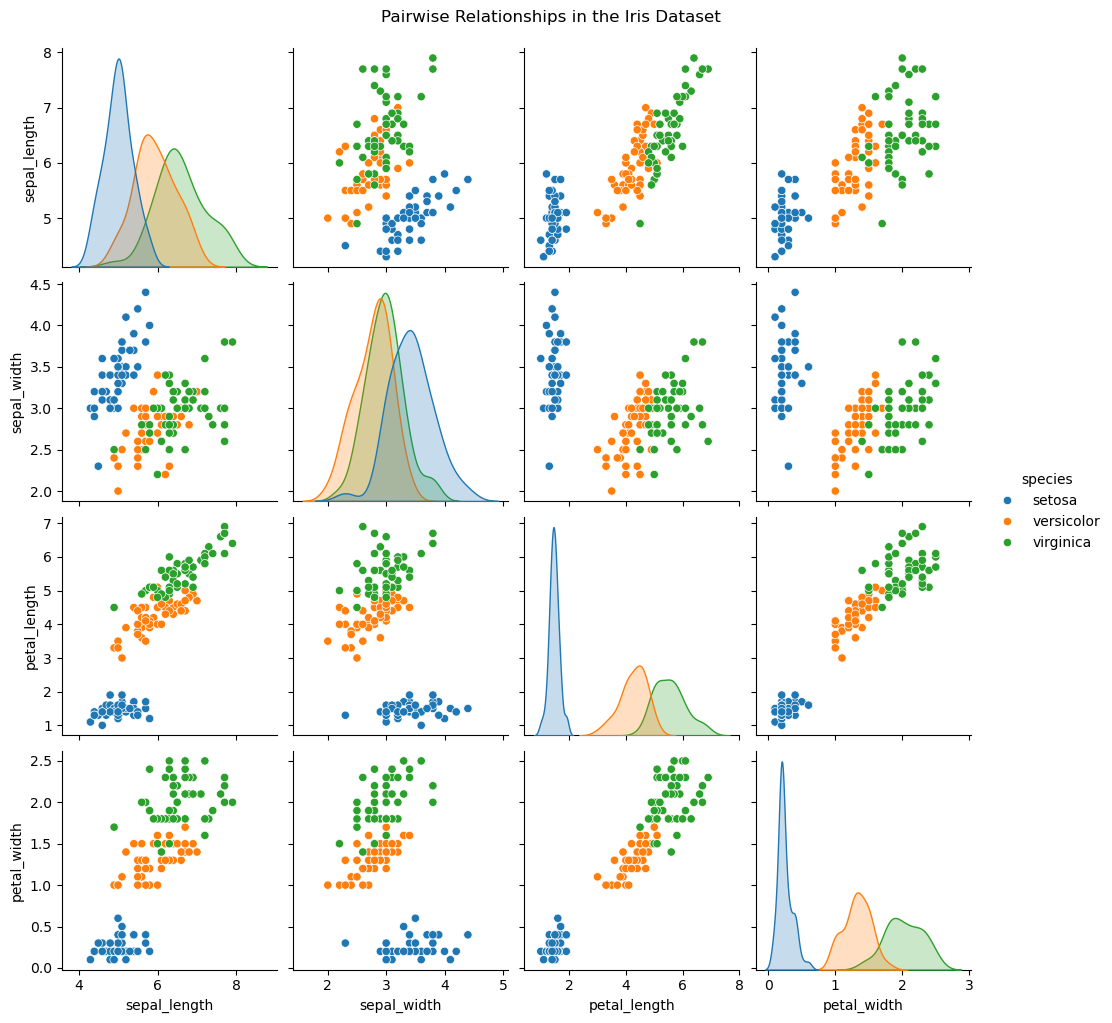

In [2]:
iris = sns.load_dataset('iris')

# Create a pairplot to visualize relationships between all numerical features
# Color the points by the 'species' column
sns.pairplot(iris, hue='species')

# Display the plot
plt.suptitle('Pairwise Relationships in the Iris Dataset', y=1.02) # Add a title above the plots
plt.show()

Key observations to look for:

    Linear Trends: Do points generally form a line? For instance, petal length and petal width are often strongly positively correlated.
    
    Separation by Color: Can you see distinct clusters of colors in the scatter plots? This indicates that the 'species' variable is related to the pair of features being plotted. For example, 'setosa' might be clearly separated from the other two species in plots involving petal measurements.
    
    Distribution Shapes: Are the histograms on the diagonal unimodal, bimodal, or skewed? This gives insight into the spread of each feature.
    
    Outliers: Are there points far away from the main cluster in any scatter plot?

# Correlation Heatmaps

While pairplot shows individual pairwise relationships, it can become overwhelming with many variables. A Correlation Heatmap provides a concise and powerful way to visualize the strength and direction of linear correlations between all pairs of numerical variables in a dataset.

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. In the context of correlation, a heatmap displays a matrix of correlation coefficients. Each cell in the matrix represents the correlation between two variables. The color of the cell indicates the strength and direction of the correlation: null, one color (e.g., dark blue) represents strong negative correlation, another color (e.g., dark red) represents strong positive correlation, and a neutral color (e.g., white or light gray) represents little to no correlation. The intensity of the color often corresponds to the magnitude of the correlation coefficient.

(See in image of Heatmap given in folders)

Why is it important?

Identifying Highly Correlated Features: Detecting multicollinearity, where two or more predictor variables are highly correlated with each other. This is important because high multicollinearity can destabilize some machine learning models (like linear regression) and make interpretation difficult.

Understanding Feature Importance: Identifying which features are strongly correlated with a target variable (if the target variable is included in the correlation matrix).

Data Reduction: Guiding decisions on feature selection or engineering. If two features are highly correlated, one might be redundant.
Quick Overview: Providing a compact summary of the linear relationships across the entire dataset.

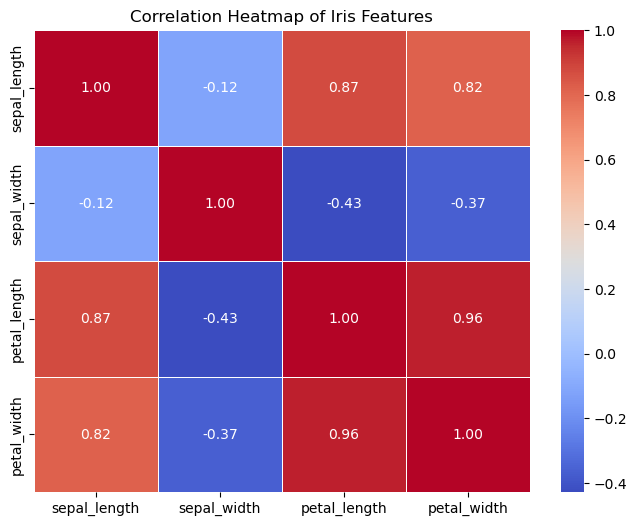

In [4]:
# Calculate the correlation matrix
correlation_matrix = iris.drop('species', axis=1).corr() # Exclude the categorical 'species' column for correlation calculation

# Create a heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# annot=True: displays the correlation values on the heatmap
# cmap='coolwarm': color map (blue for negative, red for positive)
# fmt=".2f": format the annotations to two decimal places
# linewidths=.5: adds lines between cells for better separation

plt.title('Correlation Heatmap of Iris Features')
plt.show()

The generated heatmap will visually represent the correlation matrix. Here's how to interpret it:

    Diagonal: The diagonal cells will always show a correlation of 1.00 (perfect positive correlation) because each variable is perfectly correlated with itself.
    
    Off-Diagonal Cells: These cells show the correlation between pairs of different variables.
    
    Color Intensity and Hue:
    Reddish hues (e.g., 'coolwarm' cmap) indicate positive correlations. The deeper the red, the stronger the positive correlation.
    Bluish hues indicate negative correlations. The deeper the blue, the stronger the negative correlation.
    Lighter colors (e.g., white or gray in 'coolwarm') indicate correlations close to zero (weak or no linear relationship).
    
    Annotations (annot=True): The numbers within the cells are the actual correlation coefficients, providing precise values.

# Understanding Categorical Data Distributions with Countplots

A countplot is a type of bar plot that shows the counts of observations in each categorical bin using bars. Essentially, it counts the occurrences of each unique category within a specified categorical column of your dataset and displays these counts as the height of the bars. It's a straightforward yet powerful way to visualize the distribution of categorical variables.

Why is it important?

    Assessing Category Frequencies: Quickly seeing which categories are most and least common.
        
    Identifying Imbalanced Datasets: Spotting if one or more categories are significantly underrepresented compared to others. This is critical for model training, as imbalanced datasets can lead to biased models.
    
    Understanding Data Skew: Visualizing if the data is heavily skewed towards certain categories.
        
    Data Quality Checks: Identifying potential data entry errors or unexpected categories.

Key Parameters for seaborn.countplot():

    data: The Pandas DataFrame containing the data.
    x or y: The name of the column containing the categorical data you want to plot. Use x for vertical bars (categories on x-axis) and y for horizontal bars (categories on y-axis).
    hue: Another categorical column to group the bars by, allowing for comparison of distributions across subgroups.
    order: A list specifying the order in which the categories should be displayed on the axis.
    palette: The color scheme to use for the bars.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32800\282406947.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PaymentMethod', palette='viridis')


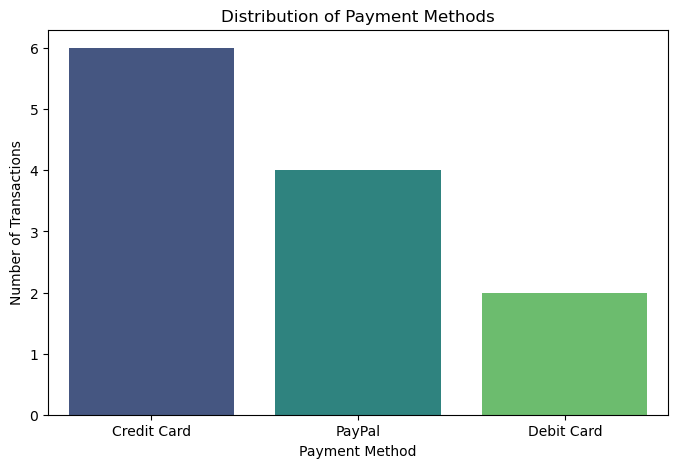

In [6]:
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'PaymentMethod': ['Credit Card', 'PayPal', 'Credit Card', 'Debit Card', 'PayPal', 
                    'Credit Card', 'Credit Card', 'PayPal', 'Debit Card', 'Credit Card', 
                    'PayPal', 'Credit Card'],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East', 'West']
}
df = pd.DataFrame(data)

# Create a countplot for the 'PaymentMethod' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PaymentMethod', palette='viridis')

plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

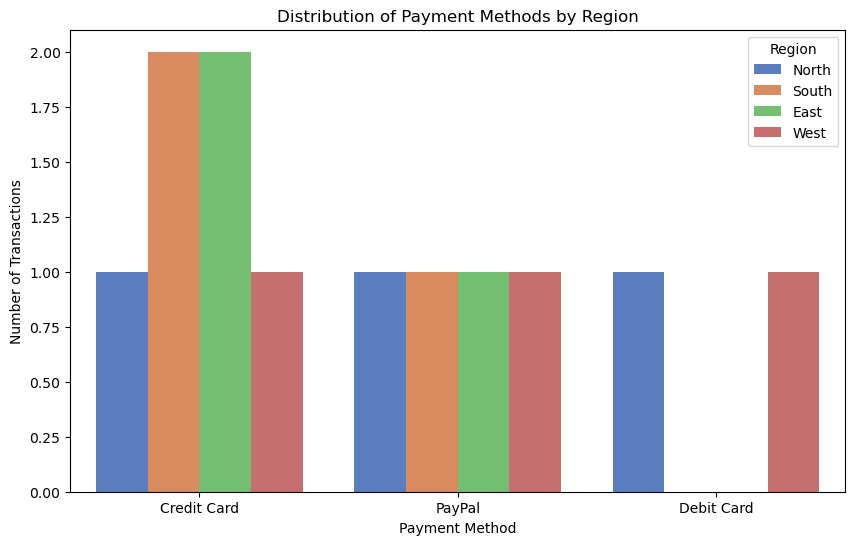

In [7]:
# Example with hue: comparing payment methods by region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Region', palette='muted')
plt.title('Distribution of Payment Methods by Region')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

Key takeaways from countplots:

Dominant Categories: Easily identify the most frequent categories.                                                                                  
Underrepresented Categories: Highlight categories with very few occurrences, which might warrant further investigation or special handling in modeling.
Comparisons: The hue parameter enables direct comparison of category distributions across different subgroups.

# Identifying Outliers and Anomalies Visually

Outliers are extreme values that lie far from the bulk of the data. Anomalies are similar but often imply a deviation from expected patterns or behaviors, which might not necessarily be extreme in value but are unusual in context.

Common Visualization Techniques for Outlier Detection:

We will focus on two primary methods:

Box Plots: Excellent for visualizing the distribution of numerical data and identifying potential outliers based on the Interquartile Range (IQR).    
Scatter Plots: Useful for spotting outliers in the context of relationships between two variables.                                                  

Real-world examples and scenarios:                                                                                                                   
Finance: Detecting fraudulent credit card transactions (anomalies in spending patterns).                                                             
Manufacturing: Identifying defective products based on unusual measurements.                                                                         
Healthcare: Spotting patients with exceptionally high or low vital signs.                                                                              

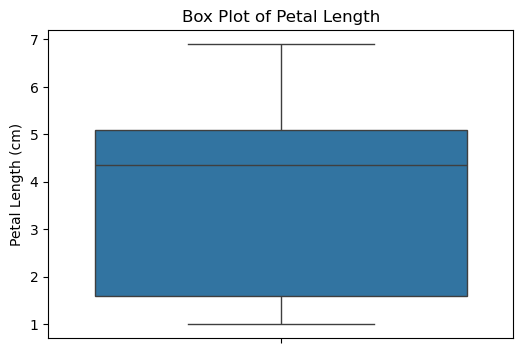

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=iris['petal_length'])
plt.title('Box Plot of Petal Length')
plt.ylabel('Petal Length (cm)')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32800\3766861443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=iris, palette='Set2')


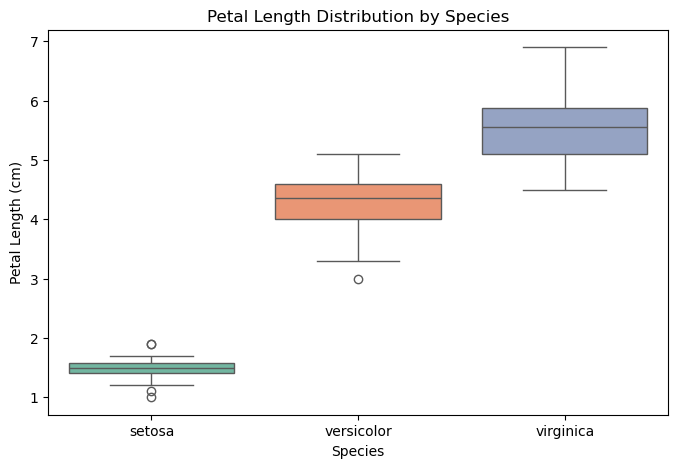

In [10]:
# Create box plots comparing 'petal_length' across different species
plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='petal_length', data=iris, palette='Set2')
plt.title('Petal Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show() 

In the first box plot (for 'petal_length' overall), look for individual points plotted outside the whiskers. These are potential outliers. The presence of many points far from the box suggests a distribution with a long tail or significant variability.

In the second box plot (comparing species), you can see how the distribution and potential outliers differ for 'setosa', 'versicolor', and 'virginica'.

'Setosa' typically has very short petals, so its box plot will be low, and outliers might be few or non-existent.
'Versicolor' and 'Virginica' have longer petals, and their distributions will be higher up. You might observe more outliers in these groups, especially if there are individuals with unusually long or short petals for their species.
Scatter Plots for Outlier Detection:

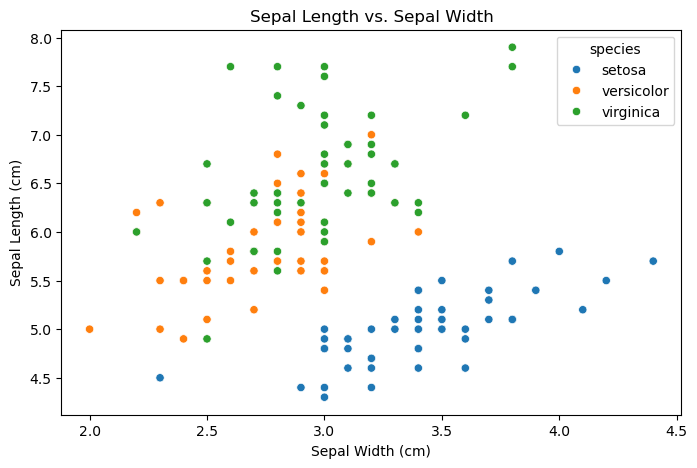

In [12]:
# Create a scatter plot of sepal length vs. sepal width
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal_width', y='sepal_length', data=iris, hue='species')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.show()

In this scatter plot, observe if any points deviate significantly from the main cloud of points for each species. For instance, a flower with a very small sepal width but a large sepal length might be an outlier in this relationship.

# Visualizing Data Trends and Patterns Over Time or Sequence

What are trends and patterns?

Trends refer to the general direction of the data over time (upward, downward, or stable). Patterns can include seasonality (repeating cycles within a fixed period, like daily or yearly), cyclical behavior (longer-term, non-fixed period fluctuations), or other recurring structures.

Why is it important?

Forecasting: Understanding historical trends and seasonality is fundamental for predicting future values.
Identifying Anomalies: Deviations from established trends or patterns can signal unusual events or system changes.
Understanding Dynamics: Visualizing how a variable changes over time provides insights into underlying processes.
Performance Monitoring: Tracking key metrics over time to assess performance and identify areas for improvement.

Common Visualization Techniques:

Line Plots: The most common and effective way to visualize trends in sequential or time-series data.                                               
Area Plots: Similar to line plots but fill the area beneath the line, useful for showing cumulative effects or proportions over time.

Real-world examples and scenarios:

Economics: Tracking GDP growth, inflation rates, or unemployment figures over years.                                                                 
Weather: Visualizing temperature, rainfall, or humidity changes over days, months, or years.                                                 
Technology: Monitoring server load, website traffic, or application performance metrics over time.                                           
Finance: Analyzing stock prices, trading volumes, or portfolio performance.                     

What is a Line Plot?

A line plot connects a series of data points with straight line segments. It is particularly effective for visualizing how a numerical variable changes over a continuous dimension, most commonly time. The x-axis typically represents the sequence or time, and the y-axis represents the measured value.

In [18]:
import numpy as np

dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
# dates will be a sequence from 2023-01-01 to 2023-04-10 (100 days total) with a daily frequency('D').
# Simulate a trend with some noise and seasonality
trend = np.linspace(0, 50, 100)
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, 100))
noise = np.random.normal(0, 5, 100)
values = trend + seasonality + noise

time_series_df = pd.DataFrame({'Date': dates, 'Value': values})

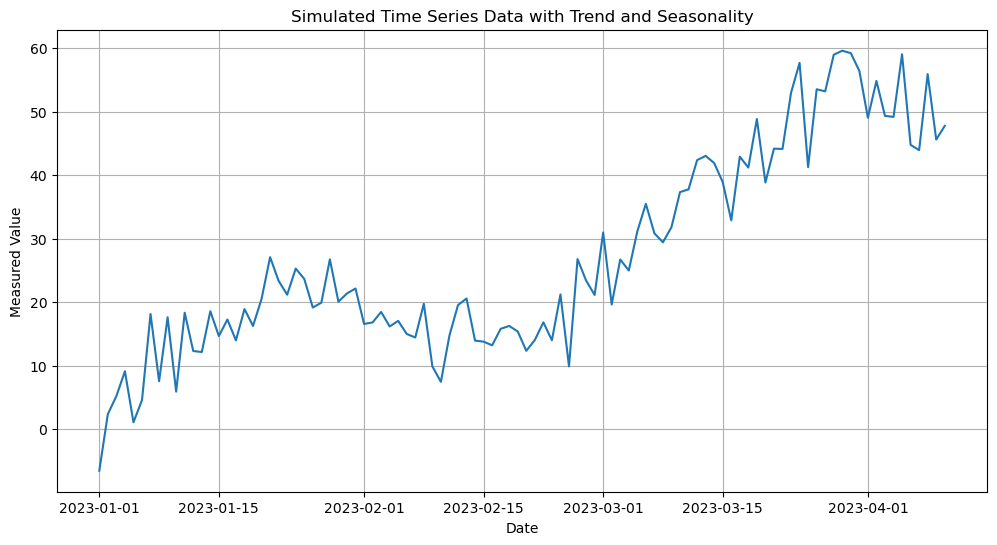

In [19]:
# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_df, x='Date', y='Value')

plt.title('Simulated Time Series Data with Trend and Seasonality')
plt.xlabel('Date')
plt.ylabel('Measured Value')
plt.grid(True)
plt.show()

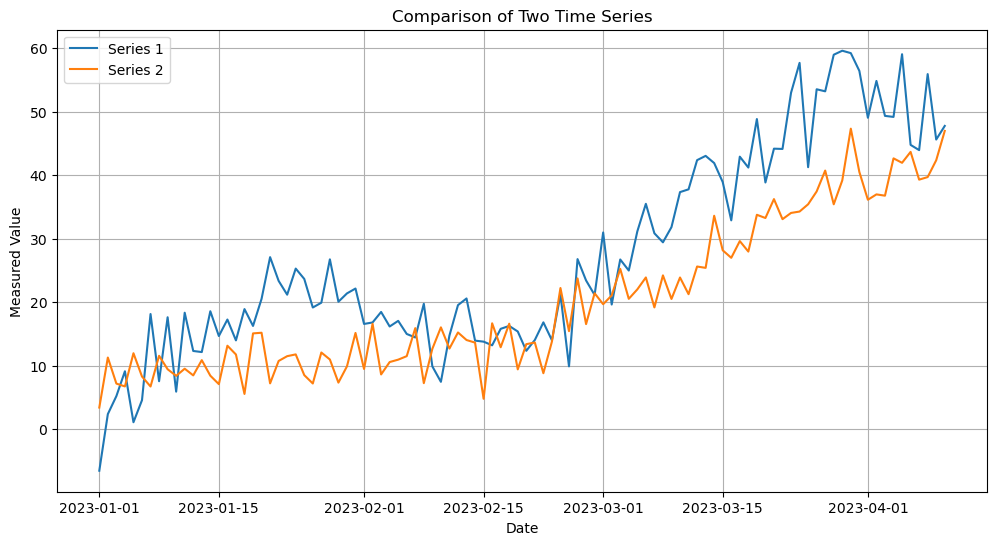

In [20]:
# Example with multiple lines (e.g., comparing two different series)
values2 = trend * 0.8 + 5 * np.cos(np.linspace(0, 2 * np.pi, 100)) + np.random.normal(0, 3, 100)
time_series_df['Value2'] = values2

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_df, x='Date', y='Value', label='Series 1')
sns.lineplot(data=time_series_df, x='Date', y='Value2', label='Series 2')

plt.title('Comparison of Two Time Series')
plt.xlabel('Date')
plt.ylabel('Measured Value')
plt.legend()
plt.grid(True)
plt.show()

**Interpreting the first line plot**:

Overall Trend: Observe the general direction of the line. In this simulated data, it clearly moves upwards from left to right, indicating an increasing trend.
Seasonality/Cycles: Look for repeating up-and-down movements within the overall trend. The sine wave component creates these fluctuations. You might see peaks and troughs occurring at regular intervals.
Noise: The random fluctuations represent noise. While it can obscure the underlying patterns, it's a natural part of most real-world data.
Anomalies: If a point suddenly jumps or drops dramatically and unexpectedly, it could be an anomaly.

**Interpreting the second line plot (comparison)**:

This plot allows you to compare the behavior of two different series over the same time period. You can observe:

Which series generally has higher or lower values.
Whether their trends are similar or diverge.
If their seasonal patterns align or are out of phase.
Periods where one series is increasing while the other is decreasing.
Line plots are fundamental for time-series analysis and understanding dynamic data. They provide an intuitive way to grasp the evolution of variables over time.

# Choosing the Right Plot for Your Data and Question

## The Goal: Clarity and Insight
The primary objective of **Exploratory Data Analysis (EDA) visualizations** is to **facilitate understanding**.  
The best plot **clearly communicates patterns, relationships, or distributions** in the data relevant to your analytical question.

---

## Key Considerations When Choosing a Plot

1. **Type of Data**  
   - Numerical (continuous or discrete)  
   - Categorical  

2. **Number of Variables**  
   - Single variable (distribution)  
   - Two variables (relationship)  
   - Multiple variables (interactions)  

3. **The Question You're Asking**  
   - Is there a correlation?  
   - What is the distribution?  
   - How does a variable change over time?  
   - Are there outliers?  
   - How do groups compare?

---

## Decision Framework: Plot Types

### 1️⃣ Understanding Distributions of a Single Variable
- **Numerical**:  
  - **Histogram** → Frequency distribution  
  - **Density Plot** → Smooth version of histogram  
  - **Box Plot** → Quartiles, median, outliers  
- **Categorical**:  
  - **Countplot** → Frequency of each category  
  - **Bar Plot** → Counts or aggregate measures per category  

### 2️⃣ Understanding Relationships Between Two Variables
- **Numerical vs Numerical**:  
  - **Scatter Plot** → Individual data points & relationship  
  - **Line Plot** → If one variable is sequential/time  
- **Numerical vs Categorical**:  
  - **Box Plot** → Compare distributions across categories  
  - **Violin Plot** → Box plot + density estimation  
  - **Bar Plot** → Aggregate numerical measure per category  
- **Categorical vs Categorical**:  
  - **Heatmap of contingency table** → Counts of co-occurrences  
  - **Grouped Bar Plot** → Counts of one category by another  

### 3️⃣ Understanding Relationships Among Multiple Variables
- **Pair Plots (Scatter Plot Matrix)** → Pairwise relationships & distributions  
- **Correlation Heatmaps** → Strength of linear correlations  
- **3D Scatter Plots** → Relationships between three numerical variables (**use with caution**)  

### 4️⃣ Understanding Trends Over Time / Sequence
- **Line Plot** → Shows changes of numerical variable over time  
- **Area Plot** → Visualizes cumulative totals or proportions over time  

---

## Real-world Examples

1. **Marketing Campaign Analysis**  
   - Ad spend (numerical) vs Sales (numerical) → **Scatter Plot**  
   - Ad channels used (categorical) → **Countplot**  
   - Sales over campaign duration (time) → **Line Plot**  

2. **Medical Research**  
   - Blood pressure (numerical) across treatment groups (categorical) → **Box Plot / Violin Plot**  
   - Patient recovery over weeks (time) → **Line Plot**  


# Principles for Creating Insightful Visualizations

# Principles of Effective Data Visualization

## 1️⃣ Know Your Audience and Purpose
- **Audience**: Tailor the complexity and terminology based on whether your audience is technical peers, business stakeholders, or a general audience.  
- **Purpose**: Define the specific message you want to convey:  
  - Show a trend  
  - Highlight a correlation  
  - Identify an outlier  
  - Compare distributions  
- Ensure your visualization **directly addresses this purpose**.

---

## 2️⃣ Choose the Right Plot Type
- Select a plot that **matches your data type** and answers your analytical question.  
- Avoid **3D plots** unless absolutely necessary; they can distort perception.

---

## 3️⃣ Keep it Simple and Clean
- **Avoid Clutter**: Remove unnecessary gridlines, borders, background colors, and excessive labels.  
- **Minimalist Design**: Focus on the data; use whitespace effectively.  
- **Appropriate Color Use**:  
  - Highlight key information or distinguish categories.  
  - Avoid overly bright or clashing colors.  
  - Consider **colorblind-friendly palettes**.

---

## 4️⃣ Label Clearly and Concisely
- **Titles**: Clear, descriptive titles explaining what the plot shows.  
- **Axis Labels**: Label both axes with meaningful names and units (e.g., 'Temperature (°C)', 'Revenue ($)').  
- **Legends**: Include a legend when using color, shape, or line styles.  
- **Annotations**: Use sparingly to highlight important points or trends.

---

## 5️⃣ Ensure Data Accuracy and Integrity
- **Correct Data**: Verify that you are plotting the right, preprocessed data.  
- **Accurate Representation**: Avoid visual distortions; e.g., bar charts should start at zero.  
- **Context**: Provide relevant context like time periods or data sources.

---

## 6️⃣ Tell a Story
- Guide the viewer towards understanding.  
- Arrange plots logically and use annotations to highlight key findings.  
- Ensure **narrative flow** when presenting multiple visualizations.

---

## 7️⃣ Accessibility
- Use **colorblind-friendly palettes**.  
- Ensure text is legible.  
- Make visualizations understandable for individuals with visual impairments (e.g., provide alternative text).
